# Lab 5: Drzewa Decyzyjne

### Przygotowanie danych

In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
#print(data_breast_cancer['DESCR'])

<AxesSubplot:xlabel='x', ylabel='y'>

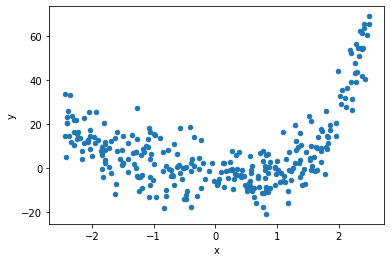

In [2]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

### Klasyfikacja

In [3]:
from sklearn.tree import DecisionTreeClassifier

X_cancer = data_breast_cancer.data[["mean texture", "mean symmetry"]].copy()
y_cancer = data_breast_cancer.target

In [4]:
from sklearn.model_selection import train_test_split
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer,
                                                                                test_size=0.20, random_state=42)

* Rozne glebokosci drzewa:

In [5]:
tree_clf_d1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf_d2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
tree_clf_d1.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [7]:
tree_clf_d2.fit(X_train_cancer, y_train_cancer) 

DecisionTreeClassifier(max_depth=2, random_state=42)

In [8]:
tree_clf_d3.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=3, random_state=42)

* Generowanie drzewa decyzyjnego:

In [9]:
from sklearn.tree import export_graphviz

tree_clf = [tree_clf_d1, tree_clf_d2, tree_clf_d3]
file = ["cancer_tree_train1.dot", "cancer_tree_train2.dot", "cancer_tree_train3.dot"]

In [10]:
for index in range(len(tree_clf)):
    export_graphviz(
        tree_clf[index],
        out_file=file[index],
        feature_names=data_breast_cancer.feature_names[[1,8]],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(y_cancer),
                         data_breast_cancer.target_names)],
        rounded=True,
        filled=True
    ) 
    print(file[index])

cancer_tree_train1.dot
cancer_tree_train2.dot
cancer_tree_train3.dot


* zapisywanie obrazka png

In [11]:
import graphviz
from sklearn.metrics import f1_score

ModuleNotFoundError: No module named 'graphviz'

### Drzewa decyzyjne i wartosci f1

glebokosc = 1

In [ ]:
graph = graphviz.Source.from_file("cancer_tree_train1.dot")
graph

In [ ]:
print(f1_score(y_train_cancer, tree_clf_d1.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d1.predict(X_test_cancer)))

glebokosc = 2

In [ ]:
graph = graphviz.Source.from_file("cancer_tree_train2.dot")
graph

In [ ]:
print(f1_score(y_train_cancer, tree_clf_d2.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d2.predict(X_test_cancer)))

glebokosc = 3

In [ ]:
graph = graphviz.Source.from_file("cancer_tree_train3.dot")
graph

In [ ]:
print(f1_score(y_train_cancer, tree_clf_d3.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d3.predict(X_test_cancer)))

In [ ]:
# zapiswyanie obrazka:

print(graphviz.render('dot', 'png', "bc"))